In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Dataset .csv")

# Display the first few rows and the summary of the data
# print(data.head())
# print(data.info())

# Preprocess the data
# Step 1: Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 2: Encode categorical variables
# Identify categorical columns
categorical_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

data_imputed2 = data_imputed[categorical_cols]

# Use one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data_imputed2, columns=categorical_cols)

# Step 3: Split the data into training and testing sets
# Select the target variable (Aggregate rating) and the features
target = 'Aggregate rating'
features = data_encoded



# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, data_imputed[target], test_size=0.2, random_state=42)

# Step 4: Train a regression model
# Use Random Forest Regressor for this example (other regressors can also be used)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


# Step 6: Analyze the most influential features
# Feature importances from the Random Forest Regressor
# Use 'feature_importances_' instead of 'feature_importance'
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': regressor.feature_importances_  # Corrected attribute name
})

# Sort by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)





Mean Squared Error (MSE): 0.033760397498761634
R-squared: 0.9851674952111273


Feature Importances:
                    Feature  Importance
1994  Rating text_Not rated    0.469347
1989     Rating color_White    0.433057
1987    Rating color_Orange    0.027475
1991    Rating text_Average    0.024447
1988       Rating color_Red    0.013705
1995       Rating text_Poor    0.008652
1990    Rating color_Yellow    0.007060
1993       Rating text_Good    0.006057
1996  Rating text_Very Good    0.000918
1992  Rating text_Excellent    0.000709


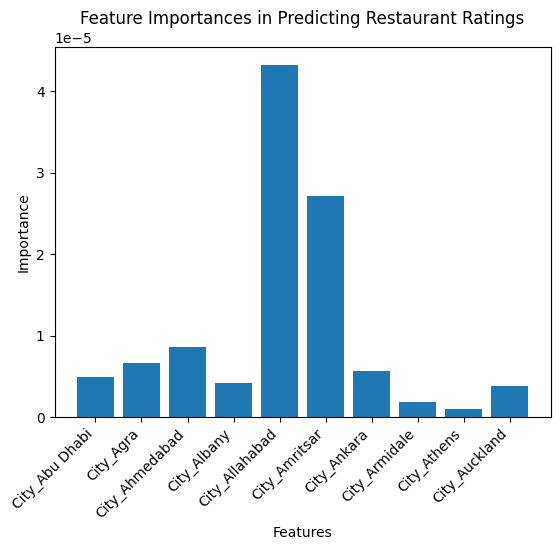

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': regressor.feature_importances_  # Corrected attribute name
})

print("Feature Importances:")
print(feature_importances.sort_values(by='Importance', ascending=False)[:10])


# plt.figure(figsize=(12, 8))
plt.bar(x=feature_importances['Feature'][:10], height=feature_importances['Importance'][:10])

# Improve readability
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importances in Predicting Restaurant Ratings")
plt.xticks(rotation=45, ha='right')  # Rotate text labels for better readability
plt.show()

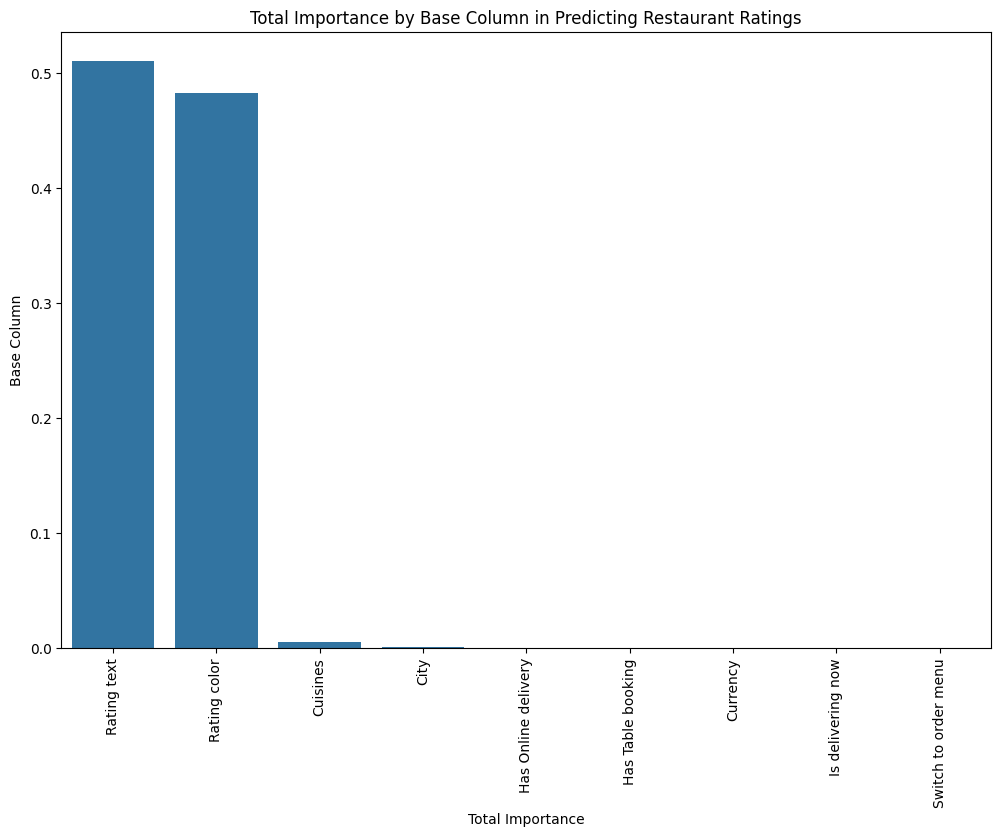

In [46]:
# Group features by their source column
# Extract the base column name from each one-hot encoded feature
feature_importances['Base Column'] = feature_importances['Feature'].str.split('_', expand=True)[0]

# Sum the importances for each base column
grouped_importance = feature_importances.groupby('Base Column')['Importance'].sum().sort_values(ascending=False)

# Plot the total importance for each base column
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(x=grouped_importance.index, y=grouped_importance.values)
# sns.barplot(x=grouped_importance.values, y=grouped_importance.index)
plt.title("Total Importance by Base Column in Predicting Restaurant Ratings")
plt.xlabel("Total Importance")
plt.ylabel("Base Column")
plt.show()
